In [10]:
import pandas as pd

datasetPath = "../datasets/"

dataPath = "./data3/"
df = pd.read_csv(dataPath + "/Apache-0001-classification.csv")

In [11]:
df[df['sr']==100]

,FN,FP,TN,TP,sr,t
3822,0.6,0.6,0.4,18.4,100,870
3823,0.6,0.5,0.5,18.4,100,900
3824,0.6,0.4,1.6,17.4,100,930
3825,1.1,0.5,2.5,15.9,100,960
3826,0.6,0.7,2.3,16.4,100,960
3827,0.5,0.8,3.2,15.5,100,990
3828,1.2,0.7,3.3,14.8,100,990
3829,1.0,0.8,4.2,14.0,100,1020
3830,0.7,1.2,3.8,14.3,100,1020
3831,1.0,0.7,4.3,14.0,100,1050


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [5]:
data = df[df['sr']==100].sum()
fpr = data['FP'] / (data['FP']+data['TN'])
tpr = data['TP'] / (data['FN']+data['TP'])
#roc_auc_data = auc(fpr, tpr)

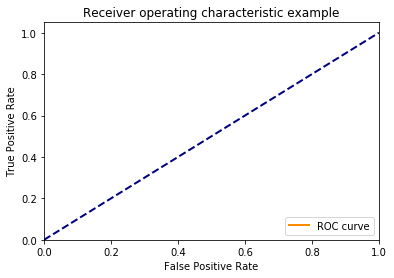

In [9]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')# (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
tpr

0.9093085106382979

/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[1. 0.]
[1. 0.]
[2. 1. 0.]
[2. 1. 0.]
[2. 1. 0.]
[2. 1. 0.]
[2. 1. 0.]
[1. 0.]
[2. 1. 0.]
[1. 0.]


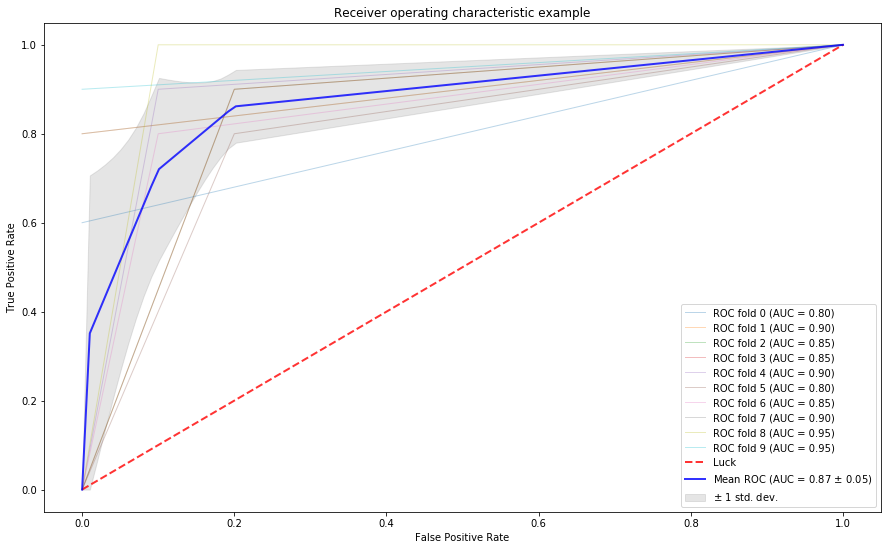

In [24]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree

# #############################################################################
# Data IO and generation
filename = "Apache"
d = pd.read_csv(datasetPath+filename+".csv")

threshold = 1200

d["label"] = 0
d.loc[d["perf"] > threshold, "label"] = 1

X = d.drop(["perf"],axis=1,errors="ignore")
y = d["label"]

'''
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
'''
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves

sr = 0.3
NSUBS=10
shuffle_split = StratifiedShuffleSplit(train_size=sr, n_splits=NSUBS)

classifier = tree.DecisionTreeClassifier()

'''
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)
'''

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in shuffle_split.split(X, y):
    probas_ = classifier.fit(X.drop(["label"],axis=1).iloc[train], y.iloc[train]).predict_proba(X.drop(["label"],axis=1).iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    print(thresholds)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.rcParams["figure.figsize"] = [15,9]

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


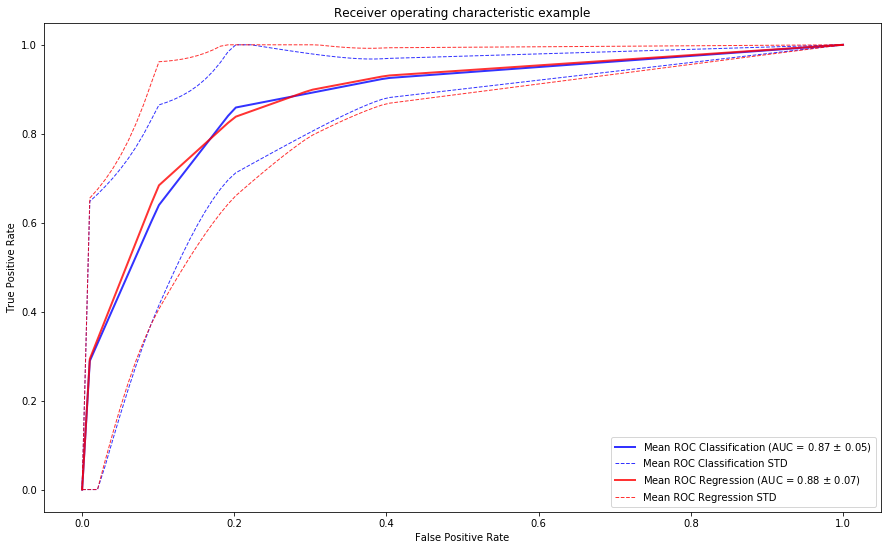

In [72]:
filename = "Apache"
d = pd.read_csv(datasetPath+filename+".csv")

threshold = 1200

d["label"] = 0
d.loc[d["perf"] > threshold, "label"] = 1

X = d.drop(["perf"],axis=1,errors="ignore")
y = d["label"]

sr = 0.3
NSUBS=10
shuffle_split = StratifiedShuffleSplit(train_size=sr, n_splits=NSUBS)

classifier = tree.DecisionTreeClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in shuffle_split.split(X, y):
    probas_ = classifier.fit(X.drop(["label"],axis=1).iloc[train], y.iloc[train]).predict_proba(X.drop(["label"],axis=1).iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    #print(thresholds)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC Classification (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.rcParams["figure.figsize"] = [15,9]

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, tprs_lower, '--', color='b',
         label=r'Mean ROC Classification STD',
         lw=1, alpha=.8)

plt.plot(mean_fpr, tprs_upper, '--', color='b',
         #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=1, alpha=.8)

d = pd.read_csv(datasetPath+filename+".csv")

d["label"] = 0
d.loc[d["perf"] > threshold, "label"] = 1

X = d.drop(["perf","label"],axis=1,errors="ignore")
y = d["perf"]
y_split = d["label"]

classifier = tree.DecisionTreeRegressor()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in shuffle_split.split(X, y_split):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test]) > threshold
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test] > threshold, probas_)
    #print(thresholds)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='r',
         label=r'Mean ROC Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.rcParams["figure.figsize"] = [15,9]

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, tprs_lower, '--', color='r',
         label=r'Mean ROC Regression STD',
         lw=1, alpha=.8)

plt.plot(mean_fpr, tprs_upper, '--', color='r',
         #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=1, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('foo.png')
#plt.show()

In [73]:
resultsList = pd.read_csv("./data3/results-list.csv")
serie = []
for i in resultsList['results']:
    serie.append(i.split("-")[2].split(".")[0])
#print(serie)

serie = pd.Series(serie)

resultsList['type'] = serie
accuracy = []
for i in resultsList['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    accuracy.append(dfMean['accuracy'].mean())
resultsList['accuracy'] = pd.Series(accuracy)

idx = resultsList.groupby(["file","type"])["accuracy"].transform(max) == resultsList['accuracy']
resultsList[idx][((resultsList['type'] == "classification") | (resultsList['type'] == "regression")) & (resultsList['file'] == "Apache")]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,presort,random_state,results,splitter,type,accuracy
0,NaN,entropy,Apache,40.0,NaN,10,1.000000e-07,1,2,0.0,False,NaN,./data3/Apache-0001-classification.csv,best,classification,0.898975
17,NaN,mse,Apache,40.0,NaN,80,1.000000e-07,2,2,0.0,False,NaN,./data3/Apache-0018-regression.csv,best,regression,0.907197


In [74]:
configSet = []
resultsList2 = resultsList[idx][(resultsList['type'] == "classification") | (resultsList['type'] == "regression")].where(pd.notnull(resultsList), None)
for f in resultsList2.file.unique():
    for t in resultsList2.type.unique():
        for index, r in resultsList2.loc[(resultsList["file"]==f) & (resultsList2["type"]==t)].sort_values("accuracy", ascending=False)[:10].iterrows():
            configuration = {}
            for i in r.keys():
                if not i in ["results","type","accuracy","file"]:
                    if not (r["type"] == "regression" and i=="class_weight"):
                        configuration[i] = r[i]
            configSet.append({"file":r["file"],"type":r["type"],"configuration":configuration})

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [110]:
dfConfig = pd.DataFrame(configSet)
for i in dfConfig.file.unique():
    print(dfConfig[(dfConfig['file'] == i) & (dfConfig['type'] == "regression")].configuration.values[0])
    break

{'criterion': 'mse', 'max_depth': 40.0, 'max_features': None, 'max_leaf_nodes': 80, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [122]:
for filename in dfConfig.file.unique():
    
    d = pd.read_csv(datasetPath+filename+".csv")
    d = d.sort_values(by="perf")

    for threshold in [d["perf"].iloc[i * d.shape[0]//4] for i in range(1, 4)]:

        d["label"] = 0
        d.loc[d["perf"] > threshold, "label"] = 1

        X = d.drop(["perf"],axis=1,errors="ignore")
        y_reg = d["perf"]
        y_classif = d["label"]
        
        n = X.shape[1] - 1

        for sr in [n,2*n,3*n]:
            NSUBS=10
            shuffle_split = StratifiedShuffleSplit(train_size=sr, n_splits=NSUBS)

            classifier = tree.DecisionTreeClassifier(**dfConfig[(dfConfig['file'] == filename) & (dfConfig['type'] == "classification")].configuration.values[0])
            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            i = 0
            for train, test in shuffle_split.split(X, y_classif):
                probas_ = classifier.fit(X.drop(["label"],axis=1).iloc[train], y_classif.iloc[train]).predict_proba(X.drop(["label"],axis=1).iloc[test])
                # Compute ROC curve and area the curve
                fpr, tpr, thresholds = roc_curve(y_classif.iloc[test], probas_[:, 1])
                #print(thresholds)
                tprs.append(interp(mean_fpr, fpr, tpr))
                tprs[-1][0] = 0.0
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)
                #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

                i += 1

            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            plt.plot(mean_fpr, mean_tpr, color='b',
                     label=r'Mean ROC Classification (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                     lw=2, alpha=.8)

            plt.rcParams["figure.figsize"] = [15,9]

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

            plt.plot(mean_fpr, tprs_lower, '--', color='b',
                     label=r'Mean ROC Classification STD',
                     lw=1, alpha=.8)

            plt.plot(mean_fpr, tprs_upper, '--', color='b',
                     #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                     lw=1, alpha=.8)
            '''
            d = pd.read_csv(datasetPath+filename+".csv")

            d["label"] = 0
            d.loc[d["perf"] > threshold, "label"] = 1

            X = d.drop(["perf","label"],axis=1,errors="ignore")
            y = d["perf"]
            y_split = d["label"]'''

            classifier = tree.DecisionTreeRegressor(**dfConfig[(dfConfig['file'] == filename) & (dfConfig['type'] == "regression")].configuration.values[0])
            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            i = 0
            for train, test in shuffle_split.split(X, y_classif):
                probas_ = classifier.fit(X.iloc[train], y_reg.iloc[train]).predict(X.iloc[test]) > threshold
                # Compute ROC curve and area the curve
                fpr, tpr, thresholds = roc_curve(y_reg.iloc[test] > threshold, probas_)
                #print(thresholds)
                tprs.append(interp(mean_fpr, fpr, tpr))
                tprs[-1][0] = 0.0
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)
                #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

                i += 1

            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            plt.plot(mean_fpr, mean_tpr, color='r',
                     label=r'Mean ROC Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                     lw=2, alpha=.8)

            plt.rcParams["figure.figsize"] = [15,9]

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

            plt.plot(mean_fpr, tprs_lower, '--', color='r',
                     label=r'Mean ROC Regression STD',
                     lw=1, alpha=.8)

            plt.plot(mean_fpr, tprs_upper, '--', color='r',
                     #label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                     lw=1, alpha=.8)

            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Threshold='+str(threshold)+"/Sample="+str(sr))
            plt.legend(loc="lower right")
            plt.savefig('results2/ROC_'+filename+'_'+str(threshold)+'_'+str(sr)+'.png')
            plt.clf()

/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<Figure size 1080x648 with 0 Axes>

In [90]:
[d["perf"].iloc[i * d.shape[0]//40] for i in range(1, 40)]

[1140,
 990,
 2160,
 2430,
 2190,
 2100,
 1230,
 1260,
 1140,
 1140,
 1350,
 1020,
 1200,
 1740,
 870,
 900,
 1170,
 990,
 1170,
 990,
 1230,
 2130,
 1170,
 1110,
 1950,
 840,
 2130,
 2010,
 930,
 2070,
 1020,
 1800,
 1260,
 1410,
 1230,
 1110,
 1050,
 1980,
 1860]

In [112]:
[d["perf"].iloc[i * d.shape[0]//4] for i in range(1, 4)]

[3341, 5390, 16479]

In [113]:
d["perf"]

0       3451
1       3138
2       3314
3       3398
4       3269
5       3333
6       5231
7       5289
8       5235
9       5304
10      5241
11      5338
12      3269
13      3139
14      3264
15      3153
16      3161
17      3512
18      5228
19      5328
20      5220
21      5310
22      5309
23      5328
24     14638
25     14761
26     14562
27     14786
28     14580
29     14905
       ...  
150    16401
151    16531
152    14667
153    16392
154    14727
155    16442
156     4705
157     4894
158     4951
159     5045
160     4759
161     4920
162     4915
163     5048
164     4668
165     4897
166     4957
167     5091
168     4669
169     4898
170     4907
171     5044
172     4698
173     4943
174     4913
175     5090
176     4792
177     4880
178     4953
179     5062
Name: perf, Length: 180, dtype: int64

In [120]:
X.head()

,API,OpenCL,CUDA,TextureMemory,Linear1D,Linear2D,Array2D,LocalMemory,Blocksize,bs_32x1,...,Ldg,bs_32x2,bs_32x4,bs_64x2,bs_64x8,bs_256x1,bs_256x2,padding,pixelPerThread,label
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,64,4,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,512,4,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,320,4,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,128,4,0
